In [1]:
# Importing essential libraries/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Initialise Random State for reproducibility
RANDOM_STATE = 42

# Set display style for Seaborn
sns.set_style('whitegrid')

In [3]:
# Load Dataset
df = pd.read_csv("default of credit card clients.csv", header= 1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.shape

(30000, 25)

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_AMT3        

In [6]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='str')

## Dataset

In [7]:
# ID column is not a useful predictor
df = df.drop(columns=['ID'])

# Rename the target column
df = df.rename(columns={'default payment next month': 'DEFAULT'})

print("Shape:", df.shape)

Shape: (30000, 24)


## EDA

**Summary Statistics**

In [8]:
# Summary statistics for all variables

print("=== Summary Statistics ===\n")
print(df.describe().round(2))

print("\n=== Data Types ===\n")
print(df.dtypes)

print("\n=== Missing Values ===\n")
print(df.isnull().sum().sum(), "total missing values")

=== Summary Statistics ===

        LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
count    30000.00  30000.00   30000.00  30000.00  30000.00  30000.00   
mean    167484.32      1.60       1.85      1.55     35.49     -0.02   
std     129747.66      0.49       0.79      0.52      9.22      1.12   
min      10000.00      1.00       0.00      0.00     21.00     -2.00   
25%      50000.00      1.00       1.00      1.00     28.00     -1.00   
50%     140000.00      2.00       2.00      2.00     34.00      0.00   
75%     240000.00      2.00       2.00      2.00     41.00      0.00   
max    1000000.00      2.00       6.00      3.00     79.00      8.00   

          PAY_2     PAY_3     PAY_4     PAY_5  ...  BILL_AMT4  BILL_AMT5  \
count  30000.00  30000.00  30000.00  30000.00  ...   30000.00   30000.00   
mean      -0.13     -0.17     -0.22     -0.27  ...   43262.95   40311.40   
std        1.20      1.20      1.17      1.13  ...   64332.86   60797.16   
min       -2.00    

**Class Imbalance Check (Plot 1)**

=== Class Distribution ===

DEFAULT
0    23364
1     6636
Name: count, dtype: int64

Default rate: 22.120%


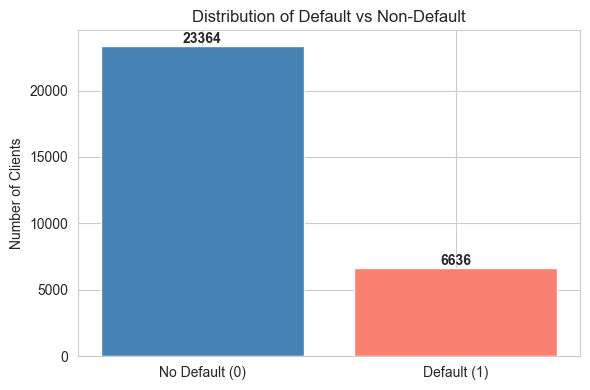

In [9]:
# Check class distribution

print("=== Class Distribution ===\n")
print(df['DEFAULT'].value_counts())
print("\nDefault rate: {:.3%}".format(df['DEFAULT'].mean()))

# Plot 1: Bar plot
fig, ax = plt.subplots(figsize=(6, 4))
counts = df['DEFAULT'].value_counts()
ax.bar(['No Default (0)', 'Default (1)'], counts.values, color=['steelblue', 'salmon'])

# Add count labels on top of each bar
for i, v in enumerate(counts.values):
    ax.text(i, v + 200, str(v), ha='center', fontweight='bold')

ax.set_ylabel('Number of Clients')
ax.set_title('Distribution of Default vs Non-Default')
plt.tight_layout()
plt.show()

The data is imbalanced as there are way more non-defaulters than defaulters. This is critical because it tells us that accuracy alone is misleading.

Default rate is 22.12%, which confirms class imbalance. Roughly 1 in 5 clients defaulted, so the dataset is skewed towards non-defaulters.

**Class Imbalance Check (Plot 2)**

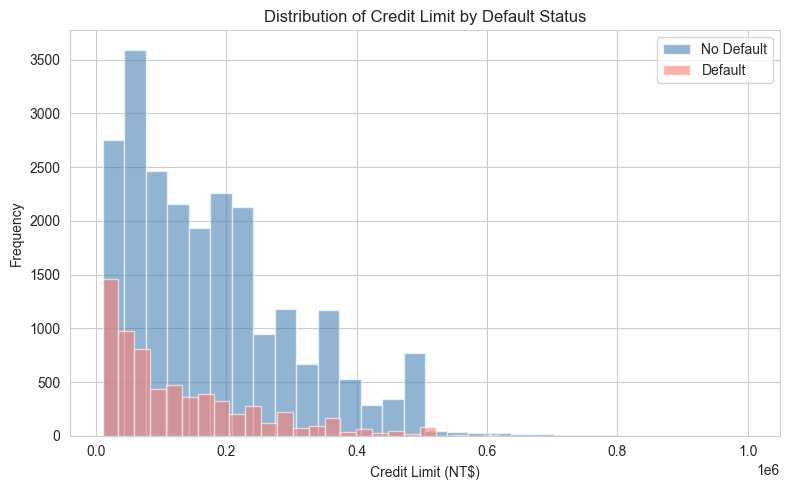

In [10]:
# Plot 2: Histogram of credit limit (LIMIT_BAL)

fig, ax = plt.subplots(figsize=(8, 5))

df[df['DEFAULT'] == 0]['LIMIT_BAL'].hist(bins=30, alpha=0.6, 
                                          label='No Default', color='steelblue', ax=ax)
df[df['DEFAULT'] == 1]['LIMIT_BAL'].hist(bins=30, alpha=0.6, 
                                          label='Default', color='salmon', ax=ax)

ax.set_xlabel('Credit Limit (NT$)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Credit Limit by Default Status')
ax.legend()
plt.tight_layout()
plt.show()

Plot 2 shows the distribution of credit limits, split by default status. We can see clients with lower credit limits tend to default more, which is a key economic intuition (lower credit limits often signal riskier borrowers).

This makes sense as lenders assign lower limits to riskier borrowers, and those borrowers are more likely to default. 

## Pre Processing & Data Split

**Inspecting Categorical Variables**

In [11]:
# Check unique values in categorical variables

print("=== SEX ===")
print(df['SEX'].value_counts().sort_index())

print("\n=== EDUCATION ===")
print(df['EDUCATION'].value_counts().sort_index())

print("\n=== MARRIAGE ===")
print(df['MARRIAGE'].value_counts().sort_index())

=== SEX ===
SEX
1    11888
2    18112
Name: count, dtype: int64

=== EDUCATION ===
EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: count, dtype: int64

=== MARRIAGE ===
MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64


**Collapse Irregular Categories**

In [12]:
# Collapse irregular codes for EDUCATION
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})

# Collapse irregular code for MARRIAGE
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3})

# Verification
print("EDUCATION after cleanup")
print(df['EDUCATION'].value_counts().sort_index())

print("\nMARRIAGE after cleanup")
print(df['MARRIAGE'].value_counts().sort_index())

EDUCATION after cleanup
EDUCATION
1    10585
2    14030
3     4917
4      468
Name: count, dtype: int64

MARRIAGE after cleanup
MARRIAGE
1    13659
2    15964
3      377
Name: count, dtype: int64


The above step is done before the pipeline because it is a data cleaning step.

**Separate Features and Target, followed by Train/Test Split**

In [13]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)

X = df.drop(columns=['DEFAULT'])
y = df['DEFAULT']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("\nDefault rate in training set: {:.2%}".format(y_train.mean()))
print("Default rate in test set: {:.2%}".format(y_test.mean()))

Training set size: 21000
Test set size: 9000

Default rate in training set: 22.12%
Default rate in test set: 22.12%


X = all features (23 columns), y = target column (DEFAULT).

**Build the Preprocessing Pipeline**

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define which columns are categorical and which are continuous
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
continuous_cols = [col for col in X.columns if col not in categorical_cols]

# Build the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),           # Standardise continuous features
        ('cat', OneHotEncoder(drop='first'), categorical_cols) # One-hot encode categoricals
    ]
)

# EDUCATION with values 1,2,3,4 becomes three columns (we drop the first to avoid multicollinearity

## Model Building and Hyper-parameter Tuning

**Random Forest Pipeline + Hyperparameter Grid**

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the full pipeline

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        class_weight='balanced',   # Handle class imbalance
        random_state=RANDOM_STATE
    ))
])

class_weight='balanced' is our chosen method to handle class imbalance.

It automatically adjusts the weight of each class inversely proportional to its frequency. So the minority class (defaults, ~22%) gets a higher weight, forcing the model to pay more attention to defaulters.

**Define the Hyperparameter Grid and Run GridSearchCV**

In [16]:
# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300],       # Number of trees
    'classifier__max_depth': [5, 10, 15],               # Max depth of each tree
    'classifier__min_samples_leaf': [5, 10, 20],         # Min samples in a leaf node
    'classifier__max_features': ['sqrt', 'log2']         # Features considered per split
}

# Count total combinations
total = 1
for v in rf_param_grid.values():
    total *= len(v)
print(f"Total combinations: {total}")
print(f"With 5-fold CV: {total * 5} fits\n")

# Run GridSearchCV with 5-fold stratified cross-validation
rf_grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    cv=5,                    # 5-fold stratified CV (stratified is default for classifiers)
    scoring='roc_auc',       # Optimise for ROC-AUC
    n_jobs=-1,               # Use all CPU cores to speed things up
    verbose=1                # Print progress
)

# Fit on training data
rf_grid_search.fit(X_train, y_train)

print("\n=== Best Hyperparameters ===")
print(rf_grid_search.best_params_)
print(f"\nBest CV ROC-AUC: {rf_grid_search.best_score_:.4f}")

Total combinations: 54
With 5-fold CV: 270 fits

Fitting 5 folds for each of 54 candidates, totalling 270 fits

=== Best Hyperparameters ===
{'classifier__max_depth': 15, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 20, 'classifier__n_estimators': 200}

Best CV ROC-AUC: 0.7845


max_depth=15 indicates that the model benefits from reasonably deep trees to capture complex patterns in repayment behaviour.

**Save the Best Random Forest Model**

In [17]:
# Save the best Random Forest model
best_rf = rf_grid_search.best_estimator_

print("Best Random Forest model saved.")
print(f"Best CV ROC-AUC: {rf_grid_search.best_score_:.4f}")

Best Random Forest model saved.
Best CV ROC-AUC: 0.7845


**Gradient Boosting Pipeline + Hyperparameter Tuning**

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the full pipeline
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
        random_state=RANDOM_STATE
    ))
])

# Define hyperparameter grid
gb_param_grid = {
    'classifier__n_estimators': [100, 200],          # Number of boosting stages
    'classifier__learning_rate': [0.05, 0.1, 0.2],   # Step size shrinkage
    'classifier__max_depth': [3, 5, 7],               # Depth of each tree
    'classifier__subsample': [0.8, 1.0]               # Fraction of samples per tree
}

total = 1
for v in gb_param_grid.values():
    total *= len(v)
print(f"Total combinations: {total}")
print(f"With 5-fold CV: {total * 5} fits\n")

# Run GridSearchCV
gb_grid_search = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=gb_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

gb_grid_search.fit(X_train, y_train)

print("\n=== Best Hyperparameters ===")
print(gb_grid_search.best_params_)
print(f"\nBest CV ROC-AUC: {gb_grid_search.best_score_:.4f}")

Total combinations: 36
With 5-fold CV: 180 fits

Fitting 5 folds for each of 36 candidates, totalling 180 fits

=== Best Hyperparameters ===
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}

Best CV ROC-AUC: 0.7830


Scikit-learn's GradientBoostingClassifier doesn't support class_weight.

**Save the Best Gradient Boosting Model**

In [19]:
# Save the best Gradient Boosting model
best_gb = gb_grid_search.best_estimator_

print("Best Gradient Boosting model saved.")
print(f"Best CV ROC-AUC: {gb_grid_search.best_score_:.4f}")

# Quick comparison
print("\n=== Cross-Validation Comparison ===")
print(f"Random Forest  CV ROC-AUC: {rf_grid_search.best_score_:.4f}")
print(f"Gradient Boosting CV ROC-AUC: {gb_grid_search.best_score_:.4f}")

Best Gradient Boosting model saved.
Best CV ROC-AUC: 0.7830

=== Cross-Validation Comparison ===
Random Forest  CV ROC-AUC: 0.7845
Gradient Boosting CV ROC-AUC: 0.7830


## Model Evaluation and Interpretation

**Predictions and ROC-AUC on Test Set**

In [20]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, roc_curve

# Get predicted probabilities on the test set
rf_probs = best_rf.predict_proba(X_test)[:, 1]   # Probability of default
gb_probs = best_gb.predict_proba(X_test)[:, 1]

# ROC-AUC on test set
rf_auc = roc_auc_score(y_test, rf_probs)
gb_auc = roc_auc_score(y_test, gb_probs)

print("=== Test Set ROC-AUC ===")
print(f"Random Forest:     {rf_auc:.4f}")
print(f"Gradient Boosting: {gb_auc:.4f}")

=== Test Set ROC-AUC ===
Random Forest:     0.7782
Gradient Boosting: 0.7783


ROC-AUC measures how well the model ranks defaulters above non-defaulters.

**Find Optimal Threshold and Compute All Metrics**

In [21]:
from sklearn.metrics import precision_recall_curve

def find_best_f1_threshold(y_true, probs):
    """Find the probability threshold that maximises F1-score."""
    precisions, recalls, thresholds = precision_recall_curve(y_true, probs)
    # Calculate F1 for each threshold
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx], f1_scores[best_idx]

# Find best threshold for each model
rf_threshold, rf_best_f1 = find_best_f1_threshold(y_test, rf_probs)
gb_threshold, gb_best_f1 = find_best_f1_threshold(y_test, gb_probs)

print(f"Random Forest  - Best threshold: {rf_threshold:.3f}, F1: {rf_best_f1:.4f}")
print(f"Gradient Boosting - Best threshold: {gb_threshold:.3f}, F1: {gb_best_f1:.4f}")

# Generate predictions using optimal thresholds
rf_preds = (rf_probs >= rf_threshold).astype(int)
gb_preds = (gb_probs >= gb_threshold).astype(int)

# Full evaluation for both models
print("\n" + "="*50)
print("RANDOM FOREST - Test Set Performance")
print("="*50)
print(f"ROC-AUC:  {rf_auc:.4f}")
print(f"Accuracy: {accuracy_score(y_test, rf_preds):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_preds):.4f}")
print(f"Confusion Matrix (threshold = {rf_threshold:.3f}):")
print(confusion_matrix(y_test, rf_preds))

print("\n" + "="*50)
print("GRADIENT BOOSTING - Test Set Performance")
print("="*50)
print(f"ROC-AUC:  {gb_auc:.4f}")
print(f"Accuracy: {accuracy_score(y_test, gb_preds):.4f}")
print(f"F1-Score: {f1_score(y_test, gb_preds):.4f}")
print(f"Confusion Matrix (threshold = {gb_threshold:.3f}):")
print(confusion_matrix(y_test, gb_preds))

Random Forest  - Best threshold: 0.561, F1: 0.5465
Gradient Boosting - Best threshold: 0.241, F1: 0.5457

RANDOM FOREST - Test Set Performance
ROC-AUC:  0.7782
Accuracy: 0.8012
F1-Score: 0.5465
Confusion Matrix (threshold = 0.561):
[[6133  876]
 [ 913 1078]]

GRADIENT BOOSTING - Test Set Performance
ROC-AUC:  0.7783
Accuracy: 0.7754
F1-Score: 0.5457
Confusion Matrix (threshold = 0.241):
[[5765 1244]
 [ 777 1214]]


**Key Observations**

ROC-AUC is virtually identical (0.7782 vs 0.7783). This shows that both models separate defaulters from non-defaulters equally well.

But the confusion matrices tell differences:

* Random Forest (threshold=0.561): More conservative as it predicts fewer defaults overall. It has higher accuracy (80.1%) but misses more actual defaulters (913 false negatives).

* Gradient Boosting (threshold=0.241): More aggressive at catching defaulters because it correctly identifies 1,214 out of 1,991 defaulters (vs RF's 1,078). But it also flags more non-defaulters incorrectly (1,244 false positives), so accuracy drops to 77.5%.


From a credit risk perspective, missing a defaulter (FN) is more costly than wrongly flagging a good client (FP). A missed default = actual financial loss.

**Conclusion**

We shall choose Gradient Boosting as our deployed model. 

**ROC Curve Plot**

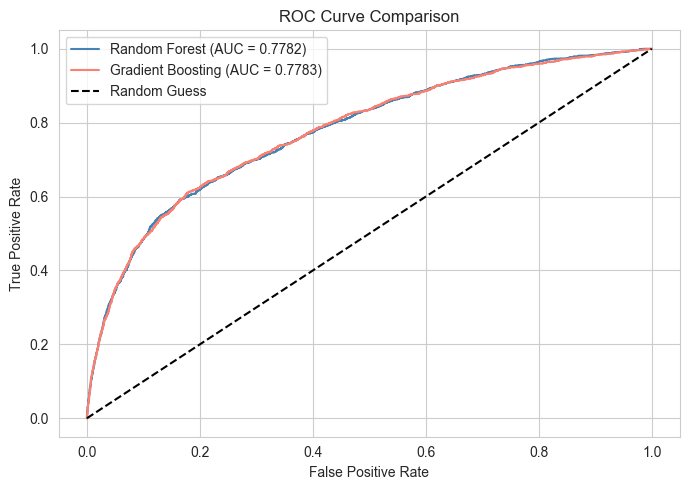

In [22]:
# Plot ROC curves for both models

fig, ax = plt.subplots(figsize=(7, 5))

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)

ax.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.4f})', color='steelblue')
ax.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.4f})', color='salmon')
ax.plot([0, 1], [0, 1], 'k--', label='Random Guess')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve Comparison')
ax.legend()
plt.tight_layout()
plt.show()

**Description of ROC Curve**

* The dashed diagonal line represents random guessing (AUC = 0.5). The further the curve bends towards the top-left, the better.

* We see both curves are nearly overlapping, thus confirming the models perform similarly.

**SHAP Analysis for Gradient Boosting**

SHAP (Shapley Additive Explanations) tells us which features drive the model's predictions and in what direction.

In [23]:
import shap

# Extract the trained Gradient Boosting classifier from the pipeline
gb_model = best_gb.named_steps['classifier']

# Transform the test data
X_test_processed = best_gb.named_steps['preprocessor'].transform(X_test)

# Get feature names after preprocessing
cat_encoder = best_gb.named_steps['preprocessor'].transformers_[1][1]
cat_feature_names = cat_encoder.get_feature_names_out(categorical_cols).tolist()
all_feature_names = continuous_cols + cat_feature_names

print(f"Total features after preprocessing: {len(all_feature_names)}")
print("\nFeature names:")
print(all_feature_names)

Total features after preprocessing: 26

Feature names:
['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_2', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3']


* We need to work with the processed data (after scaling and one-hot encoding) because that's what the model was actually trained on.

* We extract feature names so SHAP plots have readable labels

* We separate the model from the pipeline because SHAP needs to work directly with the classifier.

**Compute SHAP Values and Plot Top 10 Features**

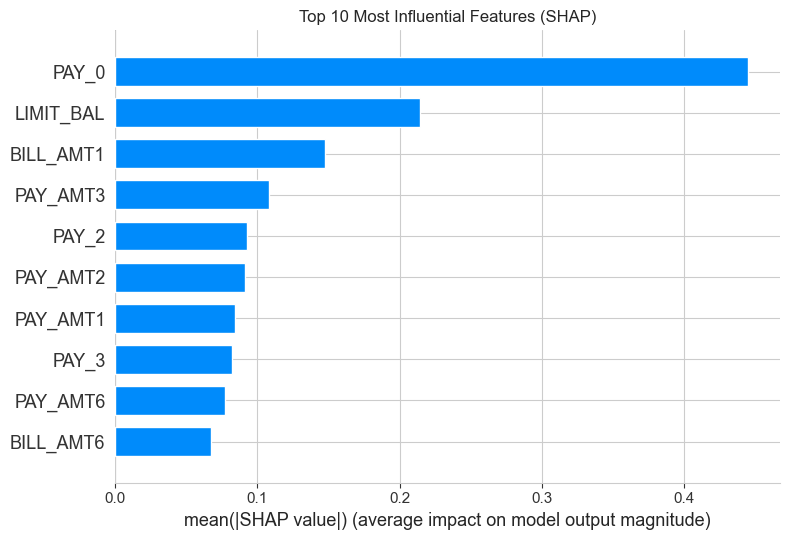

In [24]:
# Take a random subsample of 1000 observations
np.random.seed(RANDOM_STATE)
sample_idx = np.random.choice(X_test_processed.shape[0], size=1000, replace=False)
X_sample = X_test_processed[sample_idx]

# Compute SHAP values using TreeExplainer (efficient for tree-based models)
explainer = shap.TreeExplainer(gb_model)
shap_values = explainer.shap_values(X_sample)

# Plot the top 10 most influential features (bar chart)
fig, ax = plt.subplots(figsize=(8, 6))
shap.summary_plot(
    shap_values, 
    X_sample, 
    feature_names=all_feature_names, 
    plot_type='bar', 
    max_display=10, 
    show=False
)
plt.title('Top 10 Most Influential Features (SHAP)')
plt.tight_layout()
plt.show()

SHAP values tell us, for each prediction, how much each feature pushed the prediction towards default or non-default. The bar chart shows the average absolute SHAP value per feature (higher = more influential).

**Economic Intuition of the Top 10 Features:**

* PAY_0 — This is the most recent repayment status (September 2005). It captures whether the client is currently behind on payments. The strongest predictor of future default is whether someone is already late on payments right now. This is a cornerstone of credit risk theory.

* LIMIT_BAL (2nd most important) — Credit limit. As we saw in our histogram in EDA, lower credit limits are associated with higher default risk. The bank itself assigns lower limits to riskier borrowers, so this variable carries embedded risk information.

* PAY_2, PAY_3 — Repayment status from previous months. Together with PAY_0, this tells us that recent payment behaviour history is the dominant driver of default prediction. A pattern of late payments is a strong signal.

* BILL_AMT1, BILL_AMT6 — Bill statement amounts (most recent and oldest in the dataset). Higher outstanding balances relative to credit limits signal overextension  — a well-known risk factor.

* PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT6 — How much the client actually paid in previous months. Clients who pay very little relative to their bills are higher risk. This captures willingness and ability to repay.

**Big Picture**

The model identifies three types of risky borrowers:

1. Those with a history of late payments (PAY_0, PAY_2, PAY_3)

2. Those with lower credit limits (LIMIT_BAL) — a proxy for the bank's own risk assessment

3. Those with high bills but low payments (BILL_AMT vs PAY_AMT features)

This aligns perfectly with standard credit scoring theory as the behavioural variables (how you've been paying) dominate demographic variables (age, sex, education), which didn't even make the top 10.

**SHAP Analysis for Random Forest**

SHAP values shape: (1000, 26)
Data shape: (1000, 26)


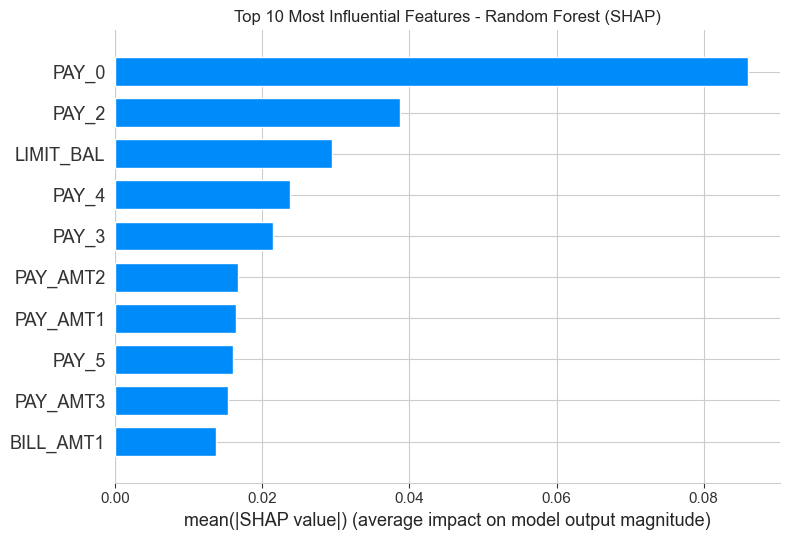

In [25]:
# Extract the trained Random Forest classifier from the pipeline
rf_model = best_rf.named_steps['classifier']

# Transform the test data using the RF preprocessor
X_test_processed_rf = best_rf.named_steps['preprocessor'].transform(X_test)

# Convert to dense array if sparse
if hasattr(X_test_processed_rf, 'toarray'):
    X_test_processed_rf = X_test_processed_rf.toarray()

# Use the same subsample for a fair comparison
X_sample_rf = X_test_processed_rf[sample_idx]

# Compute SHAP values using TreeExplainer
rf_explainer = shap.TreeExplainer(rf_model)
rf_shap_values = rf_explainer.shap_values(X_sample_rf)

# SHAP returns shape (1000, 26, 2) - third dimension is [class_0, class_1]
# We want class 1 (default)
rf_shap_values_default = rf_shap_values[:, :, 1]

# Verify shapes match
print(f"SHAP values shape: {rf_shap_values_default.shape}")
print(f"Data shape: {X_sample_rf.shape}")

# Plot the top 10 most influential features
fig, ax = plt.subplots(figsize=(8, 6))
shap.summary_plot(
    rf_shap_values_default, 
    X_sample_rf, 
    feature_names=all_feature_names, 
    plot_type='bar', 
    max_display=10, 
    show=False
)
plt.title('Top 10 Most Influential Features - Random Forest (SHAP)')
plt.tight_layout()
plt.show()

**Key Takeaways from Comaprison of Random Forest & Gradient Boosting SHAP Analyses**

* Both models agree on what matters most — PAY_0 (most recent repayment status) dominates in both.

* LIMIT_BAL, PAY_2, PAY_3, and payment amounts appear in both top 10s. This consistency is reassuring. It means the results are robust and not an artefact of one particular algorithm.

* Subtle difference — Random Forest relies more heavily on repayment status history (PAY_0 through PAY_5 — five of its top 8), while Gradient Boosting spreads importance more across bill amounts and payment amounts too. This is because Gradient Boosting's sequential learning captures subtler interactions between billing and payment behaviour.

* Neither model considers demographics important — SEX, EDUCATION, MARRIAGE, and AGE are absent from both top 10s. This tells us that behavioural variables (how you pay) matter far more than who you are, a key finding in modern credit risk modelling.

***SUMMARY***

In [26]:
print("=" * 60)
print("FINAL MODEL COMPARISON SUMMARY")
print("=" * 60)

print("\n--- Hyperparameter Grids Explored ---\n")
print("Random Forest:")
for k, v in rf_param_grid.items():
    print(f"  {k.replace('classifier__', '')}: {v}")

print("\nGradient Boosting:")
for k, v in gb_param_grid.items():
    print(f"  {k.replace('classifier__', '')}: {v}")

print("\n--- Best Hyperparameters ---\n")
print("Random Forest:")
for k, v in rf_grid_search.best_params_.items():
    print(f"  {k.replace('classifier__', '')}: {v}")

print("\nGradient Boosting:")
for k, v in gb_grid_search.best_params_.items():
    print(f"  {k.replace('classifier__', '')}: {v}")

print("\n--- Test Set Performance ---\n")
print(f"{'Metric':<15} {'Random Forest':>15} {'Gradient Boosting':>18}")
print("-" * 50)
print(f"{'ROC-AUC':<15} {rf_auc:>15.4f} {gb_auc:>18.4f}")
print(f"{'Accuracy':<15} {accuracy_score(y_test, rf_preds):>15.4f} {accuracy_score(y_test, gb_preds):>18.4f}")
print(f"{'F1-Score':<15} {f1_score(y_test, rf_preds):>15.4f} {f1_score(y_test, gb_preds):>18.4f}")

print("\n--- Recommended Model: Gradient Boosting ---")
print("""
Justification:
- Nearly identical ROC-AUC and F1-score to Random Forest.
- Catches more actual defaulters (higher recall), which is more
  valuable in credit risk where missed defaults are costly.
- Produces well-calibrated probability estimates.
- Shallow trees (max_depth=3) make it easier to explain to
  non-technical stakeholders compared to Random Forest's
  deeper trees (max_depth=15).
""")

FINAL MODEL COMPARISON SUMMARY

--- Hyperparameter Grids Explored ---

Random Forest:
  n_estimators: [100, 200, 300]
  max_depth: [5, 10, 15]
  min_samples_leaf: [5, 10, 20]
  max_features: ['sqrt', 'log2']

Gradient Boosting:
  n_estimators: [100, 200]
  learning_rate: [0.05, 0.1, 0.2]
  max_depth: [3, 5, 7]
  subsample: [0.8, 1.0]

--- Best Hyperparameters ---

Random Forest:
  max_depth: 15
  max_features: sqrt
  min_samples_leaf: 20
  n_estimators: 200

Gradient Boosting:
  learning_rate: 0.1
  max_depth: 3
  n_estimators: 200
  subsample: 0.8

--- Test Set Performance ---

Metric            Random Forest  Gradient Boosting
--------------------------------------------------
ROC-AUC                  0.7782             0.7783
Accuracy                 0.8012             0.7754
F1-Score                 0.5465             0.5457

--- Recommended Model: Gradient Boosting ---

Justification:
- Nearly identical ROC-AUC and F1-score to Random Forest.
- Catches more actual defaulters (highe

## END ##